# ESTUDO DE CASO - RELAÇÃO ENTRE VÃO E ALTURA

#### Importando bibliotecas

In [10]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leitura das amostras

In [7]:
dados_menores_custos = pd.read_excel("Dados de custo das melhores dimensoes.xlsx")

#### Tabela com adição de colunas

In [8]:
dados_menores_custos["custo/comprimento"] = dados_menores_custos["custo"]/dados_menores_custos["comprimento"]
dados_menores_custos["comprimento/altura"] = dados_menores_custos["comprimento"]/dados_menores_custos["altura"]

dados_menores_custos

,base,altura,comprimento,custo,concreto,barras longitudinais,barras transversais,custo/comprimento,comprimento/altura
150,15,15,150,26.552389,11.92,6.60,8.02,0.177016,10.000000
200,15,15,200,35.238586,15.90,8.64,10.70,0.176193,13.333333
250,15,15,250,43.924782,19.87,10.68,13.37,0.175699,16.666667
300,15,19,300,61.904167,30.21,15.18,16.52,0.206347,15.789474
350,15,25,350,88.298648,46.37,19.19,22.74,0.252282,14.000000
400,15,29,400,119.126072,61.47,28.95,28.70,0.297815,13.793103
450,15,35,450,154.924409,83.47,36.89,34.57,0.344276,12.857143
500,15,41,500,201.408929,108.64,49.44,43.33,0.402818,12.195122
550,15,47,550,247.964731,136.99,57.89,53.08,0.450845,11.702128
600,15,53,600,300.256021,168.52,70.81,60.92,0.500427,11.320755


### Relação entre a altura da viga e seu comprimento

#### Visualização básica

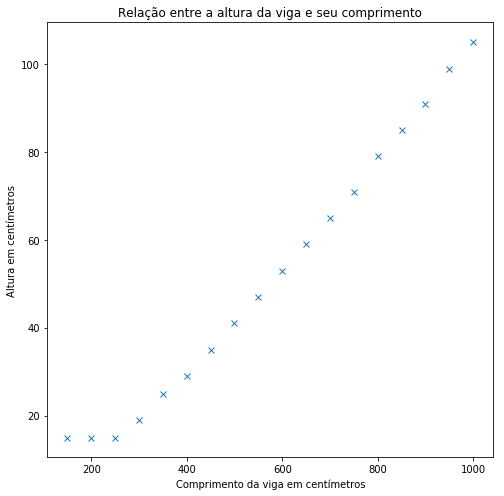

In [11]:
# Tamanho da figura a ser plotada
plt.rcParams["figure.figsize"] = (8,8)
plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")

plt.plot(dados_menores_custos["comprimento"], dados_menores_custos["altura"], "x")
plt.show()

#### Relação entre a altura da viga e seu comprimento

In [12]:
x = np.array(dados_menores_custos["comprimento"])
y = np.array(dados_menores_custos["altura"])
x_projetado = np.linspace(x[0], x[-1], 100)


In [21]:
def retornar_resultados(x, y, coeficientes):
    variacoes = np.poly1d(coeficientes)(x)-y
    x_com_falhas = x[variacoes < 0]
    print("Para as amostras, respectivamente, as variações são de:\n {}".format(np.ceil(variacoes)))


##### Considerando a parábola ideal

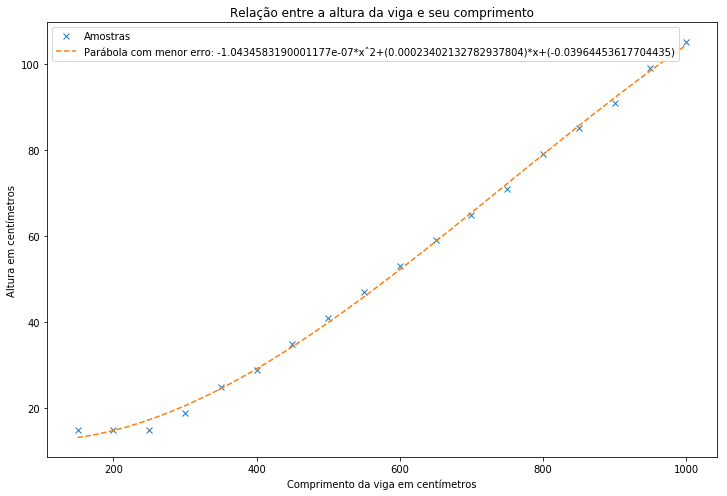

In [22]:
plt.rcParams["figure.figsize"] = (12,8)
real, = plt.plot(x, y, 'x', label="Amostras")

coeficentes_da_parabola_ideal = np.polyfit(x, y, 3)
y_projetado = np.poly1d(coeficentes_da_parabola_ideal)(x_projetado)
texto_projecao_parabola_ideal = "Parábola com menor erro: {}*xˆ2+({})*x+({})".format(*coeficentes_da_parabola_ideal)
projecao, = plt.plot(x_projetado, y_projetado, '--', label=texto_projecao_parabola_ideal)

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")
plt.legend()
plt.show()

In [23]:
retornar_resultados(x, y, coeficentes_da_parabola_ideal)

Para as amostras, respectivamente, as variações são de:
 [-1. -0.  3.  2. -0.  1. -0. -1. -1. -0. -0.  1.  2. -0.  1.  2. -0. -0.]


##### Considerando a reta ideal

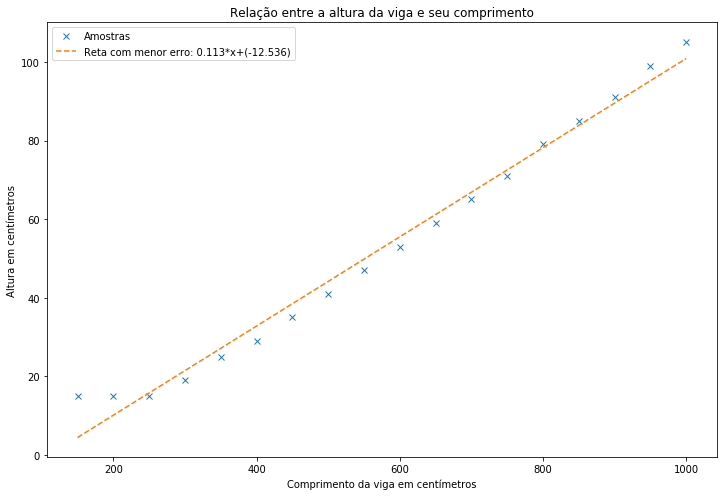

In [24]:
real, = plt.plot(x, y, 'x', label="Amostras")

coeficentes_da_reta_ideal = np.polyfit(x, y, 1)
y_projetado = np.poly1d(coeficentes_da_reta_ideal)(x_projetado)
texto_projecao_ideal = "Reta com menor erro: {}*x+({})".format(*coeficentes_da_reta_ideal.round(3))
projecao, = plt.plot(x_projetado, y_projetado, '--', label=texto_projecao_ideal)

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")
plt.legend()
plt.show()

In [25]:
retornar_resultados(x, y, coeficentes_da_reta_ideal)

Para as amostras, respectivamente, as variações são de:
 [-10.  -4.   1.   3.   3.   4.   4.   4.   3.   3.   3.   2.   2.  -0.
  -1.  -1.  -3.  -4.]


##### Considerando os valores da reta ideal que passa na origem

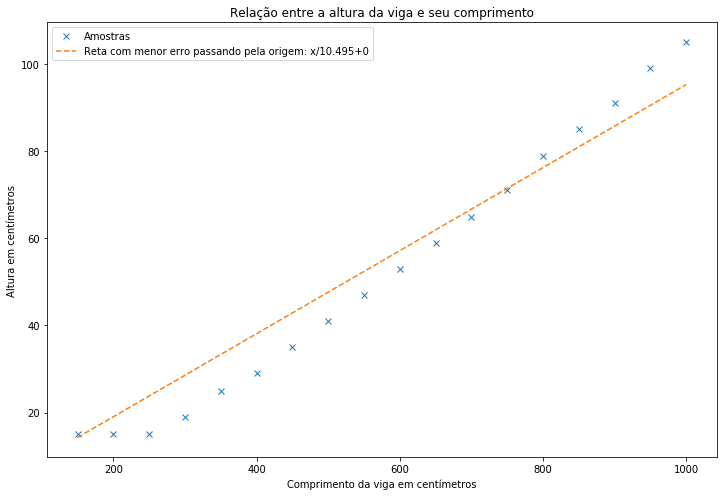

In [27]:
real, = plt.plot(x, y, 'x', label="Amostras")

coeficentes_da_reta_passando_pela_origem = np.linalg.lstsq(np.vstack((x, np.zeros_like(x))).T, y, rcond=None)[0]
y_projetado_passando_origem = np.poly1d(coeficentes_da_reta_pela_origem)(x_projetado)
texto_projecao_passando_pela_origem = "Reta com menor erro passando pela origem: x/{}+0".format((coeficentes_da_reta_passando_pela_origem[0]**(-1)).round(3))
projecao, = plt.plot(x_projetado, y_projetado_passando_origem, '--', label=texto_projecao_passando_pela_origem)

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")
plt.legend()
plt.show()

In [28]:
retornar_resultados(x, y, coeficentes_da_reta_pela_origem)

Para as amostras, respectivamente, as variações são de:
 [-0.  5.  9. 10.  9. 10.  8.  7.  6.  5.  3.  2.  1. -2. -4. -5. -8. -9.]


##### Considerando y=x/10

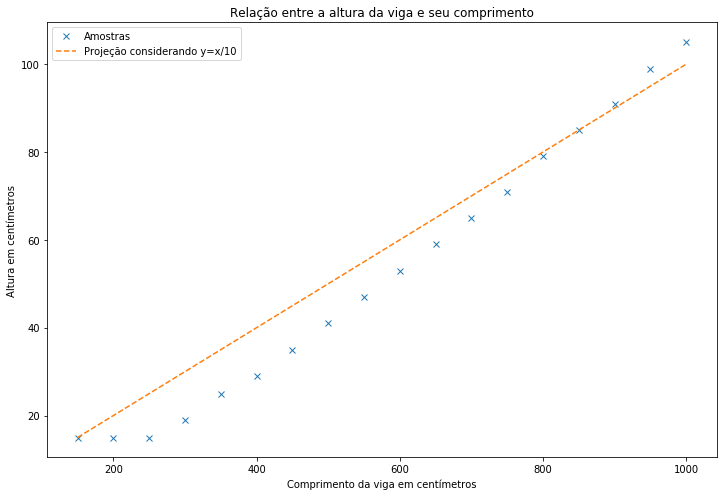

In [29]:
real, = plt.plot(x, y, 'x', label="Amostras")

coeficientes_literatura = [1/10, 0]
y_projetado_literatura = np.poly1d(coeficientes_literatura)(x_projetado)
projecao, = plt.plot(x_projetado, y_projetado_literatura, '--', label="Projeção considerando y=x/10")

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")
plt.legend()
plt.show()

In [30]:
retornar_resultados(x, y, coeficientes_literatura)

Para as amostras, respectivamente, as variações são de:
 [ 0.  5. 10. 11. 10. 11. 10.  9.  8.  7.  6.  5.  4.  1.  0. -1. -4. -5.]


##### Todas as comprações

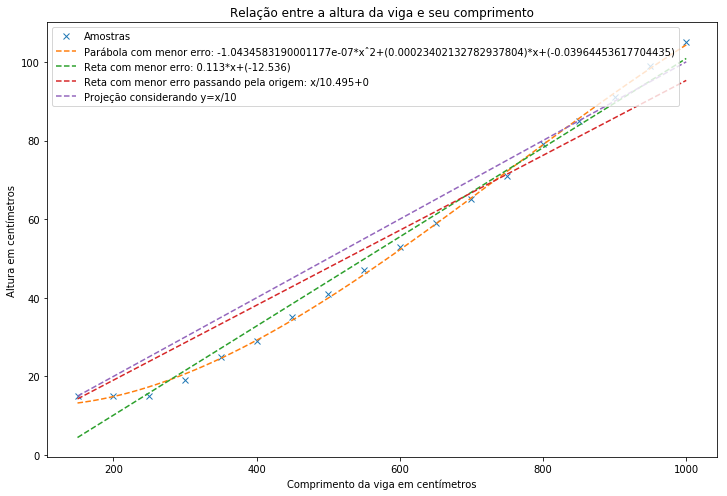

In [32]:
x = np.array(dados_menores_custos["comprimento"])
y = np.array(dados_menores_custos["altura"])
x_projetado = np.linspace(x[0], x[-1], 100)

real, = plt.plot(x, y, 'x', label="Amostras")

coeficentes_da_parabola_ideal = np.polyfit(x, y, 3, )
y_projetado = np.poly1d(coeficentes_da_parabola_ideal)(x_projetado)
texto_projecao_parabola_ideal = "Parábola com menor erro: {}*xˆ2+({})*x+({})".format(*coeficentes_da_parabola_ideal)
projecao, = plt.plot(x_projetado, y_projetado, '--', label=texto_projecao_parabola_ideal)

coeficentes_da_reta_ideal = np.polyfit(x, y, 1)
y_projetado = np.poly1d(coeficentes_da_reta_ideal)(x_projetado)
texto_projecao_ideal = "Reta com menor erro: {}*x+({})".format(*coeficentes_da_reta_ideal.round(3))
projecao, = plt.plot(x_projetado, y_projetado, '--', label=texto_projecao_ideal)


coeficentes_da_reta_passando_pela_origem = np.linalg.lstsq(np.vstack((x, np.zeros_like(x))).T, y, rcond=None)[0]
y_projetado_passando_origem = np.poly1d(coeficentes_da_reta_pela_origem)(x_projetado)
texto_projecao_passando_pela_origem = "Reta com menor erro passando pela origem: x/{}+0".format((coeficentes_da_reta_passando_pela_origem[0]**(-1)).round(3))
projecao, = plt.plot(x_projetado, y_projetado_passando_origem, '--', label=texto_projecao_passando_pela_origem)

coeficientes_literatura = [1/10, 0]
y_projetado_literatura = np.poly1d(coeficientes_literatura)(x_projetado)
projecao, = plt.plot(x_projetado, y_projetado_literatura, '--', label="Projeção considerando y=x/10")

plt.title("Relação entre a altura da viga e seu comprimento")
plt.ylabel("Altura em centímetros")
plt.xlabel("Comprimento da viga em centímetros")
plt.legend()
plt.show()